<a href="https://www.kaggle.com/code/calvinford/calvin-ford-netflix-project?scriptVersionId=138810266" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Fisrt, understand the raw data. 
# Secondly, prepare the data for Exploratory Data Analysis (EDA)
# Lastly, get summary data for deeper analysis

#Importing pandas and numpy for analysis and data manipulation
import pandas as pd
import numpy as np

In [2]:
df0 = pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv')

In [3]:
#Inspecting the dataframe 
df0.head(5)
df0.info()
print(df0.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB
(2500, 10)


In [4]:
#Checking for missing values within the dataset 
#Although the when running the .info() showed no signs of missing values
missing_values = df0.isnull().any()
missing_values

User ID              False
Subscription Type    False
Monthly Revenue      False
Join Date            False
Last Payment Date    False
Country              False
Age                  False
Gender               False
Device               False
Plan Duration        False
dtype: bool

In [5]:
df = df0.copy()

In [6]:
#Deleting Column the 'User;ID'
drop_columns = ['User ID']
df= df.drop(columns=drop_columns)
df.head(5)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [7]:
new_column_names = {'Subscription Type': 'subscription type',
                    'Monthly Revenue': 
                    'monthly revenue',
                    'Join Date': 'start date', 
                    'Last Payment Date': 'end date', 
                    'Plan Duration':'plan duration'
}
df.rename(columns=new_column_names, inplace=True)

In [8]:
#Checking to see if changes were made to the Column names
df.info()
#Changing all of the column names to lower case
df.rename(columns=lambda x: x.lower(), inplace=True)
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription type  2500 non-null   object
 1   monthly revenue    2500 non-null   int64 
 2   start date         2500 non-null   object
 3   end date           2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   plan duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription type  2500 non-null   object
 1   monthly revenue    2500 non-null   int64 
 2   start date         2500 no

subscription type    object
monthly revenue       int64
start date           object
end date             object
country              object
age                   int64
gender               object
device               object
plan duration        object
dtype: object

In [9]:
#Checking to see what subscription type is purchase the most
df['subscription type'].value_counts()
df['subscription type'].value_counts(normalize=True)*100

Basic       39.96
Standard    30.72
Premium     29.32
Name: subscription type, dtype: float64

In [10]:
#Checking country
df['country'].value_counts()
df['country'].value_counts(normalize=True)

United States     0.1804
Spain             0.1804
Canada            0.1268
United Kingdom    0.0732
Australia         0.0732
Germany           0.0732
France            0.0732
Brazil            0.0732
Mexico            0.0732
Italy             0.0732
Name: country, dtype: float64

In [11]:
#Checking gender
df['gender'].value_counts()
df['gender'].value_counts(normalize=True)

Female    0.5028
Male      0.4972
Name: gender, dtype: float64

In [12]:
#Checking device
df['device'].value_counts()
df['device'].value_counts(normalize=True)

Laptop        0.2544
Tablet        0.2532
Smartphone    0.2484
Smart TV      0.2440
Name: device, dtype: float64

In [13]:
#Checking plan duration
df['plan duration'].value_counts()
df['plan duration'].value_counts(normalize=True)

1 Month    1.0
Name: plan duration, dtype: float64

In [14]:
#Dropping the 'plan duration' column it was repetitive and all values were 1 Month
df.drop(['plan duration'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription type  2500 non-null   object
 1   monthly revenue    2500 non-null   int64 
 2   start date         2500 non-null   object
 3   end date           2500 non-null   object
 4   country            2500 non-null   object
 5   age                2500 non-null   int64 
 6   gender             2500 non-null   object
 7   device             2500 non-null   object
dtypes: int64(2), object(6)
memory usage: 156.4+ KB


In [15]:
#Condensing two columns 'start time and end time' into one column
df['start date'] = pd.to_datetime(df['start date'])
df['end date'] = pd.to_datetime(df['end date'])
df['plan duration'] = (df['end date'] - df['start date'])
df['plan duration in months'] = df['plan duration'] / pd.Timedelta(days=30.44)  # Assuming an average month has 30.44 days
df['plan duration in months'] = df['plan duration in months'].round(0)
df['plan duration in months'].value_counts()

 12.0    288
 8.0     252
 11.0    241
 13.0    218
 9.0     217
 10.0    202
 14.0    178
 7.0     175
 15.0    133
 6.0     105
 16.0    105
 5.0      71
 17.0     69
 4.0      60
 18.0     44
 3.0      40
 19.0     27
 2.0      22
 21.0     12
 20.0     11
 1.0       7
 22.0      6
-0.0       4
-1.0       4
 25.0      3
-4.0       3
-3.0       1
-2.0       1
-5.0       1
Name: plan duration in months, dtype: int64

In [16]:
#Removing the months that appear to be negative
df = df[df['plan duration in months'] >=0]
df['plan duration in months'].value_counts()
df.info
df['plan duration in months'].describe()

count    2490.000000
mean       10.793173
std         3.853822
min         0.000000
25%         8.000000
50%        11.000000
75%        13.000000
max        25.000000
Name: plan duration in months, dtype: float64

In [17]:
#Changing 'age' to 'grouped age',EX: 39 = 30, 46 = 40 etc.
def calculate_age_group(age):
    return (age//10)*10
df['age group'] = df['age'].apply(calculate_age_group)
df.groupby('age group').size()
df['age group'] = df['age group'].astype(str)

In [18]:
#Importing Data Visulation packages for making visuals
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


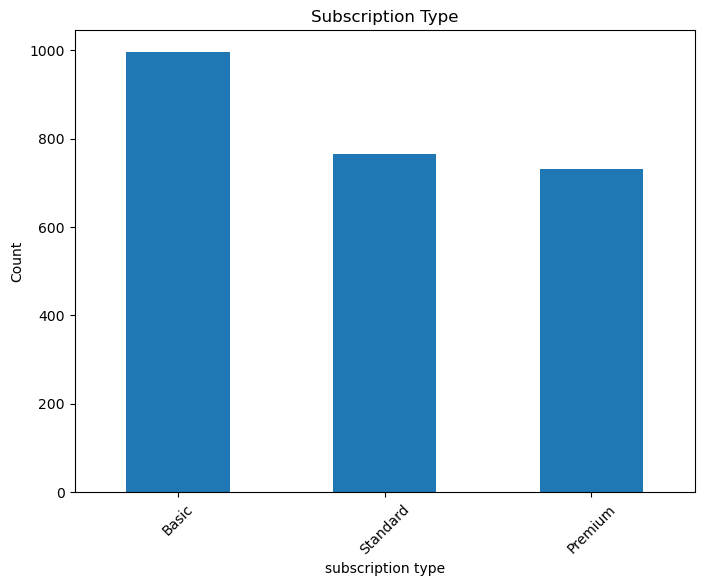

In [19]:
#Bar graph of 'subscription type'
subscription_counts = df['subscription type'].value_counts()
plt.figure(figsize = (8,6))
subscription_counts.plot(kind='bar')
plt.title('Subscription Type')
plt.xlabel('subscription type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

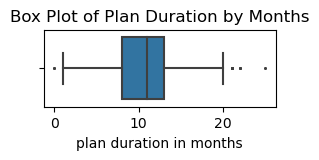

In [20]:
#Boxplot of 'plan duration in months'
plt.figure(figsize=(3,1))
sns.boxplot(x= df['plan duration in months'], fliersize=1)
plt.title('Box Plot of Plan Duration by Months')
plt.show()

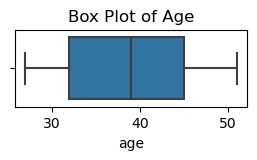

In [21]:
#Boxplot of 'age'
plt.figure(figsize=(3,1))
sns.boxplot(x= df['age'], fliersize=1)
plt.title('Box Plot of Age')
plt.show()

     subscription type  monthly revenue start date   end date         country  \
0                Basic               10 2022-01-15 2023-10-06   United States   
1              Premium               15 2021-05-09 2023-06-22          Canada   
2             Standard               12 2023-02-28 2023-06-27  United Kingdom   
3             Standard               12 2022-10-07 2023-06-26       Australia   
4                Basic               10 2023-01-05 2023-06-28         Germany   
...                ...              ...        ...        ...             ...   
2495           Premium               14 2022-07-25 2023-12-07           Spain   
2496             Basic               15 2022-04-08 2023-07-14           Spain   
2497          Standard               12 2022-09-08 2023-07-15   United States   
2498          Standard               13 2022-12-08 2023-12-07          Canada   
2499             Basic               15 2022-08-13 2023-12-07   United States   

      age  gender      devi

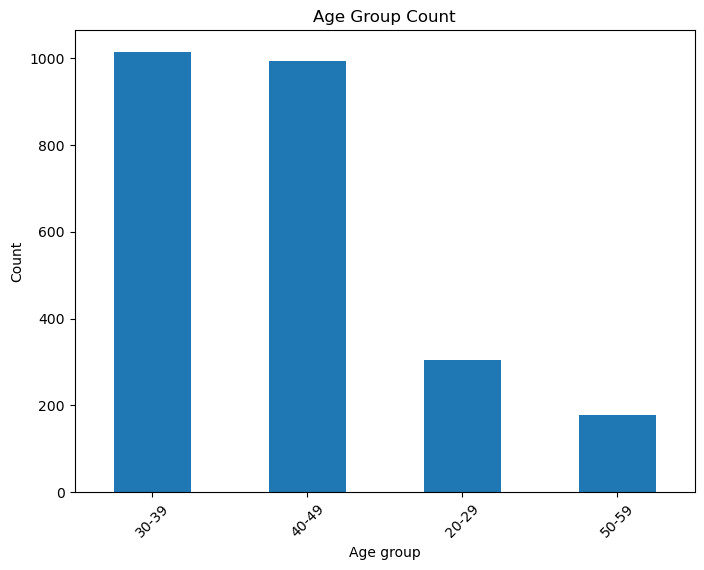

In [22]:
#Creating 'age' Bargraph
age_bin = [20,30,40,50,60]
age_label = ['20-29', '30-39', '40-49', '50-59']
df['age group'] = pd.cut(df['age'], bins=age_bin, labels=age_label, right=False)
print(df)
age_group_count = df['age group'].value_counts()
plt.figure(figsize = (8,6))
age_group_count.plot(kind='bar')
plt.title('Age Group Count')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

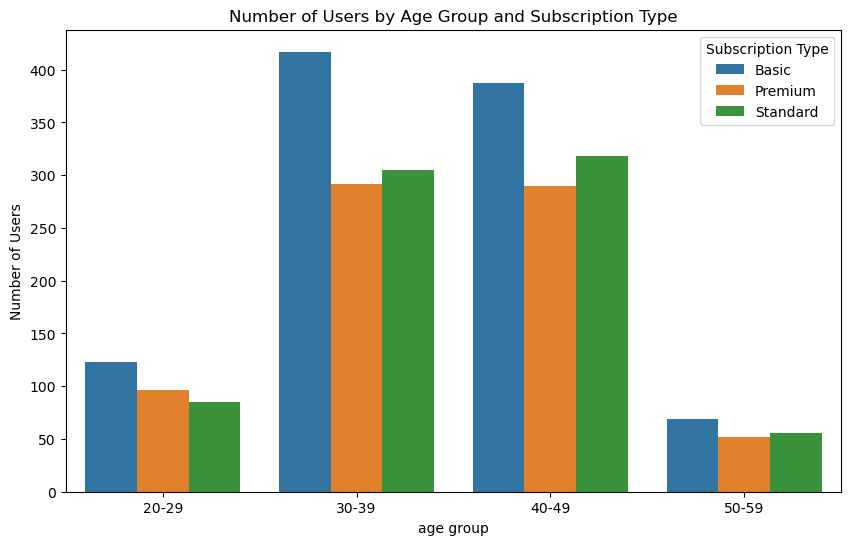

In [23]:
#Showing the ages associated with subscription types
plt.figure(figsize=(10, 6))
sns.countplot(x='age group', hue='subscription type', data=df)
plt.title('Number of Users by Age Group and Subscription Type')
plt.xlabel('age group')
plt.ylabel('Number of Users')
plt.legend(title='Subscription Type', loc='upper right')
plt.show()

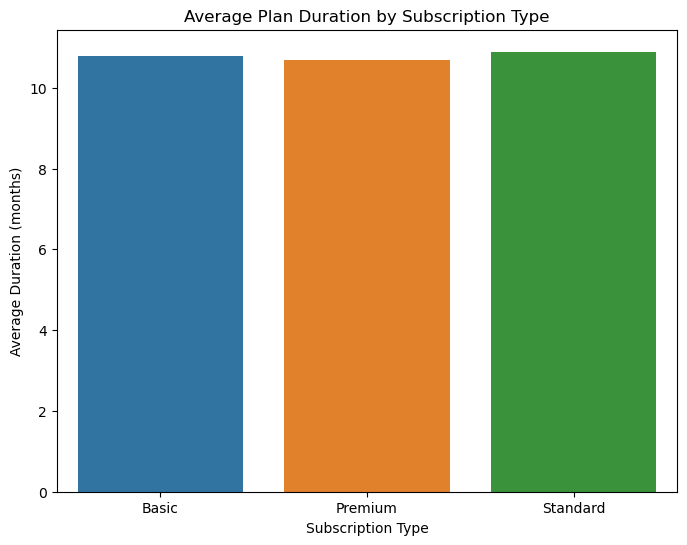

In [24]:
#Graphing the average durations of each plan
average_durations = df.groupby('subscription type')['plan duration in months'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='subscription type', y='plan duration in months', data=average_durations)
plt.title('Average Plan Duration by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Average Duration (months)')
plt.show()

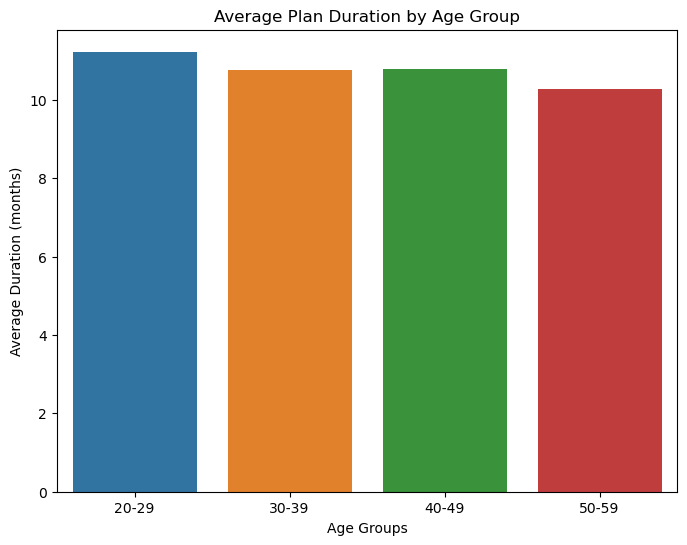

In [25]:
#Showing the ages and plan duration, which age group stays subscribed the longest?
average_duration_by_age= df.groupby('age group')['plan duration in months'].mean().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='age group', y='plan duration in months', data=average_duration_by_age)
plt.title('Average Plan Duration by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average Duration (months)')
plt.show();